# Part 1. Data Acquisition & Understanding

1. Load the California Housing dataset from sklearn.datasets (fetch_california_housing) and inspect its keys.

2. Create a DataFrame with all features. The target column is MedHouseVal (Median House Value in $100,000s).

3. Check the data types, missing values, and the summary statistics (.describe()).

4. Identify which features have the highest and lowest variance.

In [1]:
import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing(as_frame=True)

In [4]:
df = housing.frame

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Part 2. Exploratory Data Visualization

1. Create a histogram or distribution plot of the target variable (MedHouseVal) to see if the prices are
normally distributed or skewed.

2. Generate a correlation heatmap and identify which feature correlates most strongly with the house price.

3. Create a scatter plot showing the relationship between MedInc (Median Income) and MedHouseVal. Color
the points by HouseAge.

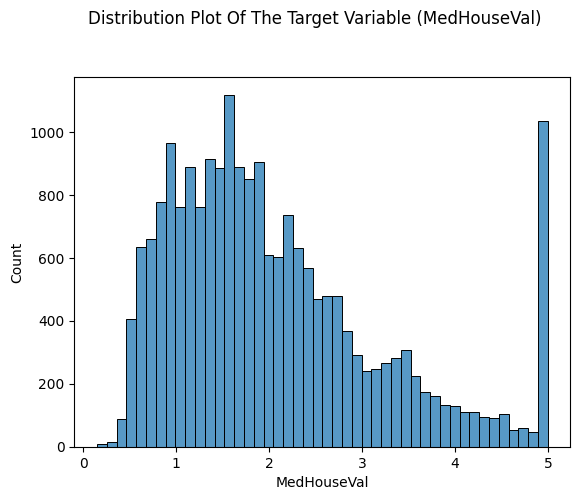

In [10]:
sns.histplot(df['MedHouseVal'])
plt.suptitle("Distribution Plot Of The Target Variable (MedHouseVal)", y=1.02)
plt.show()

In [11]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

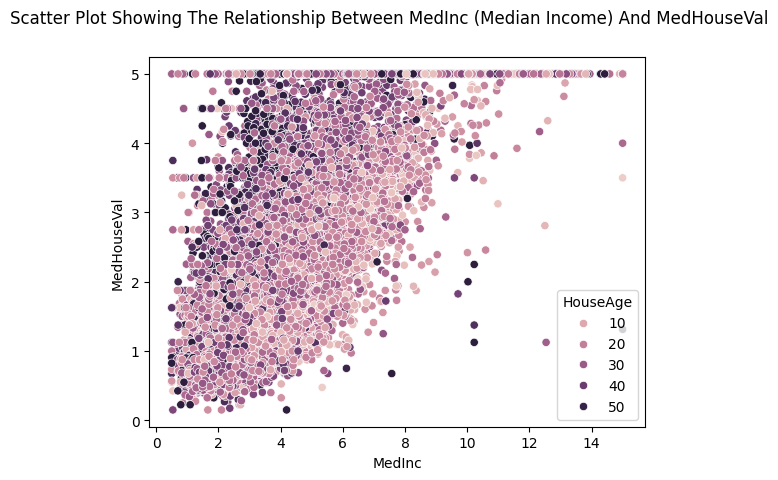

In [12]:
sns.scatterplot(data=df, x = 'MedInc', y = 'MedHouseVal', hue='HouseAge')
plt.suptitle("Scatter Plot Showing The Relationship Between MedInc (Median Income) And MedHouseVal")
plt.show()

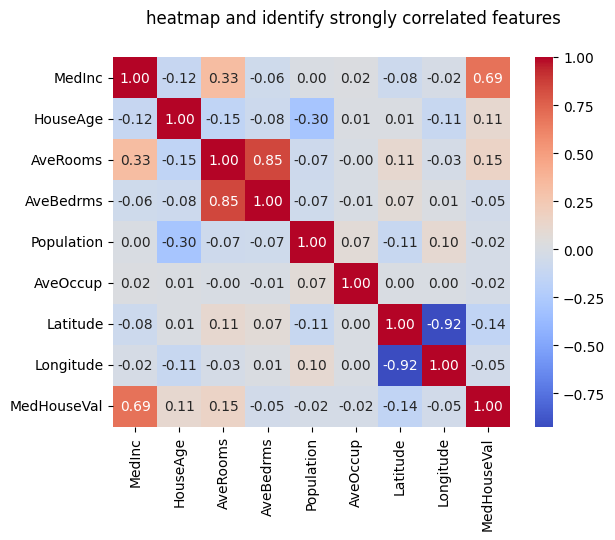

In [13]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle("heatmap and identify strongly correlated features")
plt.show()

# Part 3. Data Preparation

1. Define the feature matrix X and the target vector y.

2. Split the dataset into training (75%) and testing (25%) sets. Use random_state=42 for reproducibility.

3. Apply StandardScaler (Z-score normalization) to the training data and transform the test data. Explain why
scaling is crucial for the models you are about to use.

In [14]:
X, y = fetch_california_housing(return_X_y=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling is crucial because it ensures that all features contribute equally to the learning process. It is especially important for distance-based models such as KNN and gradient-based models such as Logistic Regression, where feature magnitude directly affects distance calculations and optimization. Proper scaling improves convergence speed, numerical stability, and overall model performance while preventing bias toward features with larger numerical ranges.

# Part 4. Model Training

1. Train a KNN Regressor (KNeighborsRegressor) with n_neighbors=5 using the scaled data.

2. Train a Decision Tree Regressor with max_depth=5 using the unscaled data (Decision trees don't require
scaling).

3. Train a Linear Regression model using the scaled data.

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
from sklearn.linear_model import LinearRegression 
lg = LinearRegression()
lg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Part 5: Model Evaluation

1. Calculate the Mean Squared Error (MSE) and R2 Score for all three models on the test set.

2. For the best performing model (highest R2), create a Plot of Actual vs. Predicted values.
- Hint: Plot a scatter plot where X is the Actual Prices and Y is the Predicted Prices. Add a diagonal line to
show perfect predictions.

3. Analyze the Residuals (errors) for the Linear Regression model. Create a histogram of the residuals to
check if they are normally distributed.


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
models = [KNN, dt, lg]
model_names = ['KNN', 'Decision Tree', 'Linear Regression']

# Train models
for mdl in models:
    mdl.fit(X_train_scaled, y_train)  # use scaled data for all for consistency

# Evaluate models
for name, mdl in zip(model_names, models):
    y_pred = mdl.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
 
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    print("-------------------------")


KNN:
  Mean Squared Error (MSE): 0.4317
  R2 Score: 0.6738
-------------------------
Decision Tree:
  Mean Squared Error (MSE): 0.5268
  R2 Score: 0.6019
-------------------------
Linear Regression:
  Mean Squared Error (MSE): 0.5411
  R2 Score: 0.5911
-------------------------


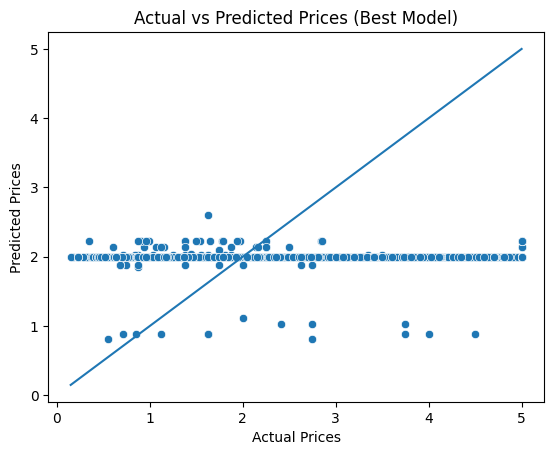

In [23]:
# Predict using the best performing model
y_pred = KNN.predict(X_test)

# Create scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Plot diagonal line (perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Best Model)")

plt.show()


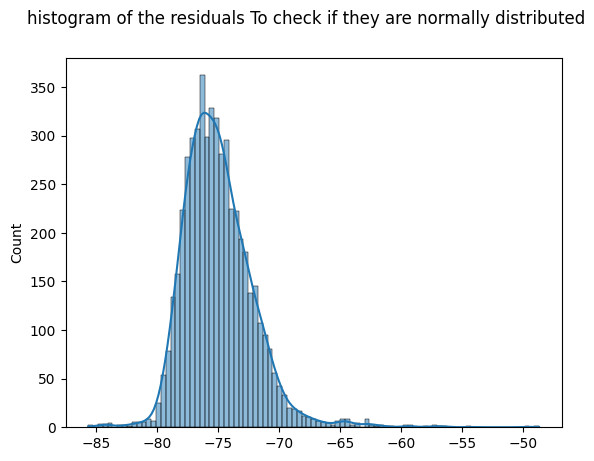

In [24]:
y_pred = lg.predict(X_test)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.suptitle("histogram of the residuals To check if they are normally distributed")
plt.show()


# Part 6: Model Comparison & Reporting

1. Create a summary table comparing the three models with columns: Model, MSE, and R2_Score.

2. Visualize the comparison using a bar plot showing the R2 score for each model.

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

models = [KNN, dt, lg]
model_names = ['KNN', 'Decision Tree', 'Linear Regression']

results = []

for name, mdl in zip(model_names, models):
    y_pred = mdl.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mse, r2])

# Create summary table
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2_Score'])
results_df

,Model,MSE,R2_Score
0,KNN,0.431691,0.673757
1,Decision Tree,0.526800,0.601880
2,Linear Regression,0.541129,0.591051


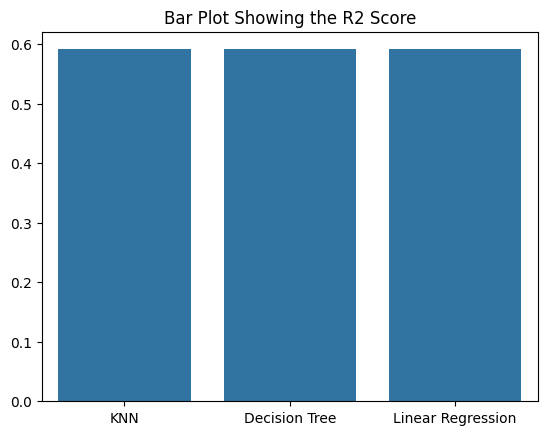

In [34]:
sns.barplot(x=model_names, y=r2)
plt.title("Bar Plot Showing the R2 Score")
plt.show()

# 3. Write a short conclusion:
- Which model predicted house prices the best?
- Did the model overfit or underfit? (Compare training vs testing scores if necessary).
- Based on the correlation heatmap, which feature is the biggest driver of house price?

In [26]:
# Training performance
y_train_pred = KNN.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)

# Testing performance
y_test_pred = KNN.predict(X_test_scaled)
r2_test = r2_score(y_test, y_test_pred)

print("Train R2:", r2_train)
print("Test R2:", r2_test)


Train R2: 0.7944311478851148
Test R2: 0.6737569252627673


- the best model predicted house prices is KNN(KNeighbors) with Accurately in R2_Score=0.6737(Higher value = better model) and we use R² because is usually better for deciding the best model.
and if you want to understanding how big the errors are you have to use MSE(mean_squared_error) because is better in that(lower value = better model). 
- The model shows signs of mild overfitting because the training R² score is li higher than the testing R² score but that is completely normal about 0.12 of difference :
Train R2: 0.7944311478851148
Test R2: 0.6737569252627673
- Based on the correlation heatmap, the feature with the highest correlation with MedHouseVal (Median House Value) is MedInc (Median Income), with a correlation of approximately 0.69. Since it has the largest absolute correlation value among all features, Median Income is the strongest driver of house prices in the dataset. This indicates that areas with higher median income tend to have higher housing prices.
